In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [62]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [63]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600.0,3102.969971,AMAZON
2020-09-15,3175.020020,3108.919922,3136.159912,3156.129883,4021500.0,3156.129883,AMAZON
2020-09-16,3187.239990,3074.149902,3179.989990,3078.100098,4512200.0,3078.100098,AMAZON
2020-09-17,3029.429932,2972.550049,3009.250000,3008.729980,6449100.0,3008.729980,AMAZON
2020-09-18,3037.800049,2905.540039,3031.739990,2954.909912,8892600.0,2954.909912,AMAZON
2020-09-21,2962.000000,2871.000000,2906.500000,2960.469971,6117900.0,2960.469971,AMAZON
2020-09-22,3133.989990,3000.199951,3033.840088,3128.989990,6948800.0,3128.989990,AMAZON
2020-09-23,3127.000000,2992.379883,3120.429932,2999.860107,5652700.0,2999.860107,AMAZON
2020-09-24,3069.300049,2965.000000,2977.790039,3019.790039,5512600.0,3019.790039,AMAZON


In [64]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,81.282451,79.093951,80.157627,80.276225,1.363279e+08,79.966325
std,19.234272,18.360620,18.989616,18.774049,5.587184e+07,18.926468
min,55.235001,53.152500,54.607498,54.419998,4.661760e+07,53.885353
25%,66.849998,65.575001,65.942501,66.417500,9.669660e+07,65.962433
50%,76.974998,75.382500,75.917503,76.912498,1.255220e+08,76.636299
75%,91.412502,89.268749,90.581253,90.736248,1.657496e+08,90.572945
max,137.979996,130.529999,137.589996,134.179993,3.743368e+08,134.179993


In [65]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-09-24 to 2020-09-25
Data columns (total 7 columns):
High            255 non-null float64
Low             255 non-null float64
Open            255 non-null float64
Close           255 non-null float64
Volume          255 non-null float64
Adj Close       255 non-null float64
company_name    255 non-null object
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


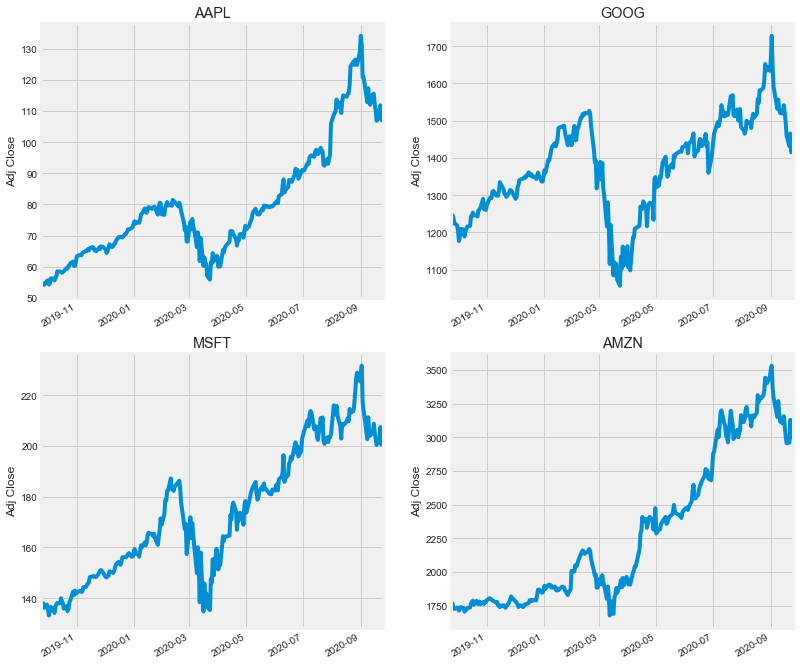

In [66]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

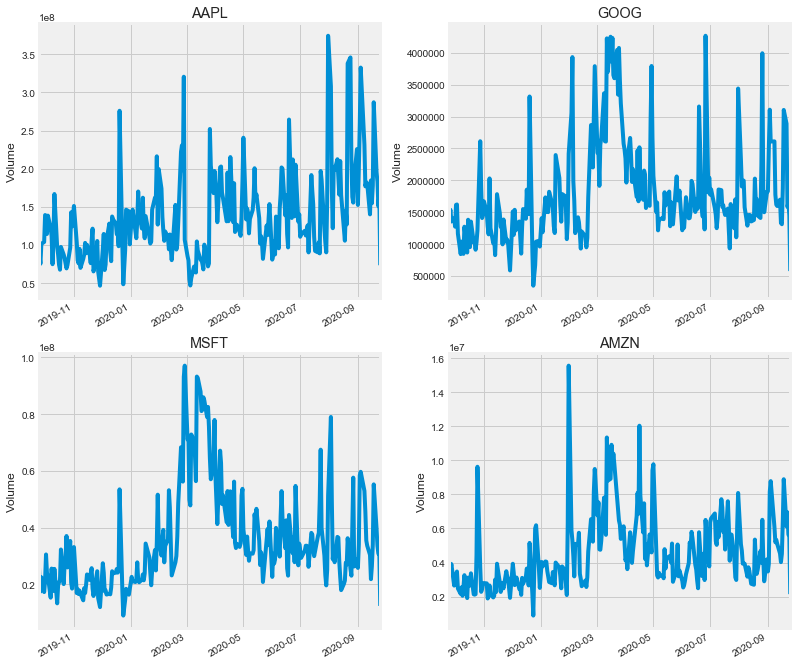

In [67]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [68]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [69]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


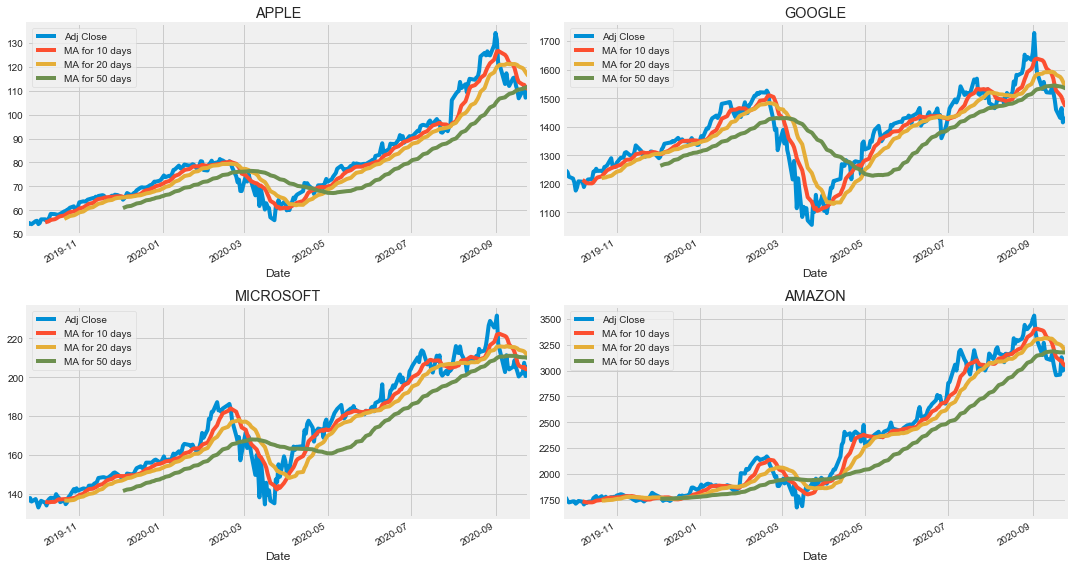

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

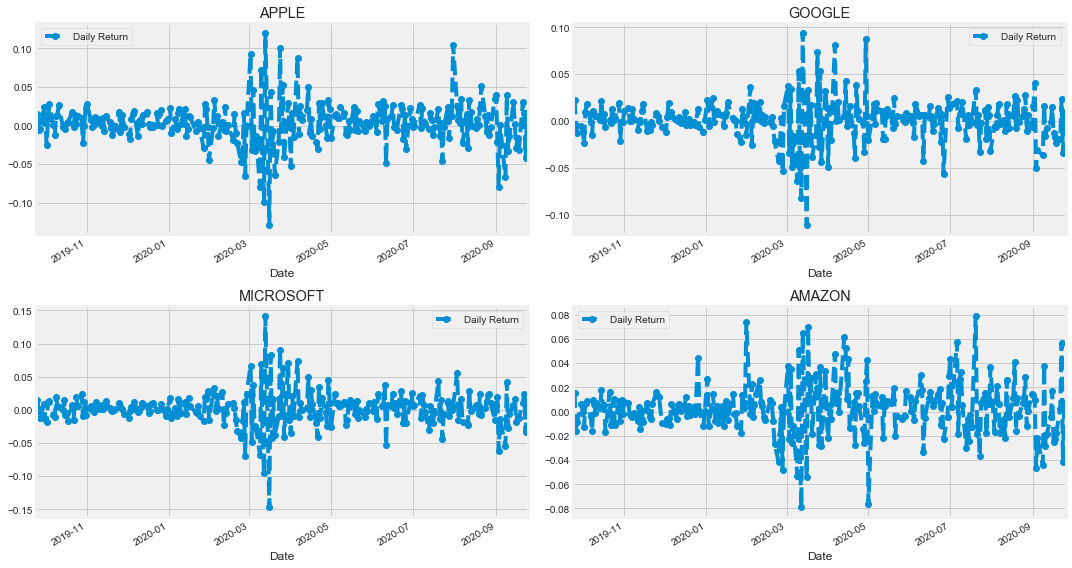

In [71]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


In [72]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-24,53.885353,1218.760010,135.833603,1741.609985
2019-09-25,54.714626,1246.520020,137.791306,1768.329956
2019-09-26,54.432430,1241.390015,137.969284,1739.839966
2019-09-27,54.167561,1225.089966,136.179642,1725.449951
2019-09-30,55.442406,1219.000000,137.465027,1735.910034


In [73]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-24,NaN,NaN,NaN,NaN
2019-09-25,0.015390,0.022777,0.014413,0.015342
2019-09-26,-0.005158,-0.004115,0.001292,-0.016111
2019-09-27,-0.004866,-0.013130,-0.012971,-0.008271
2019-09-30,0.023535,-0.004971,0.009439,0.006062


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


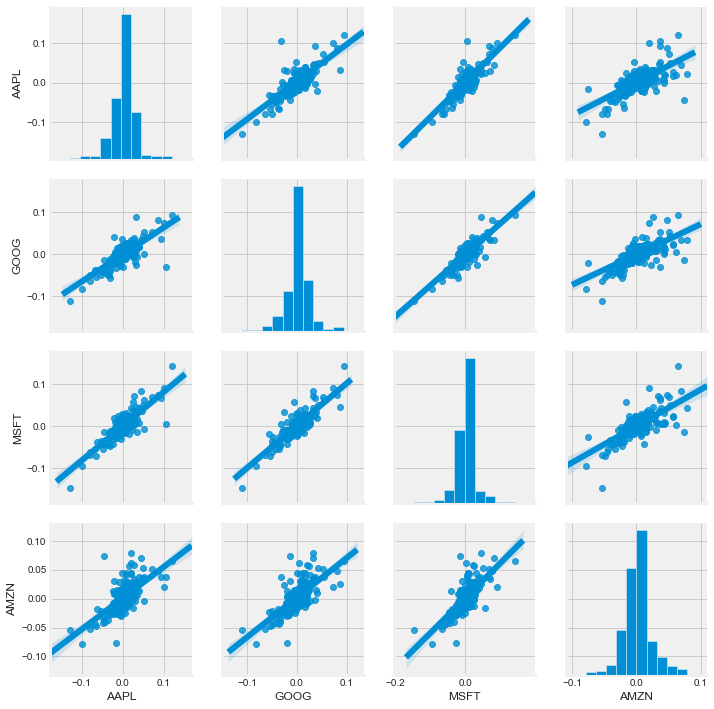

In [74]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')


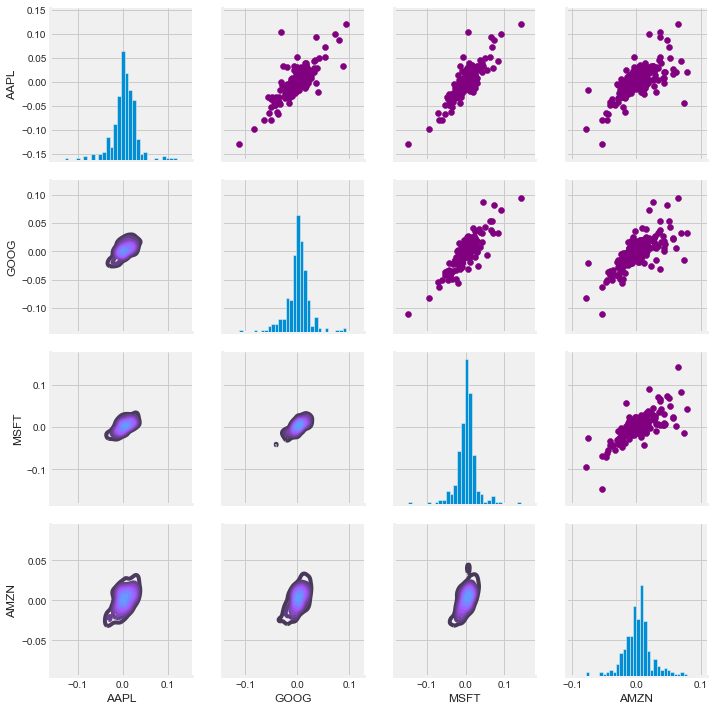

In [75]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

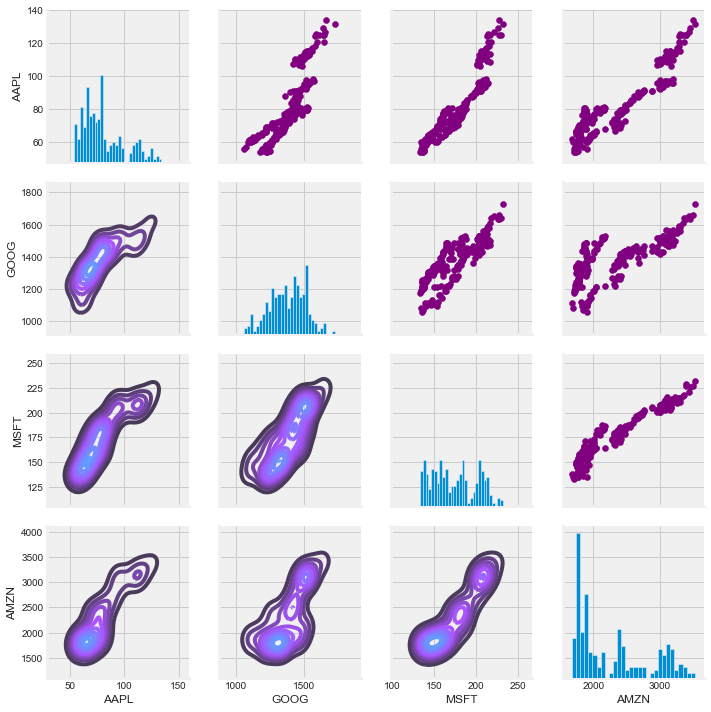

In [76]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


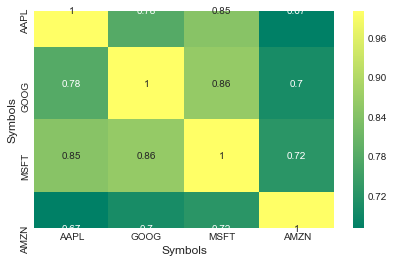

In [77]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

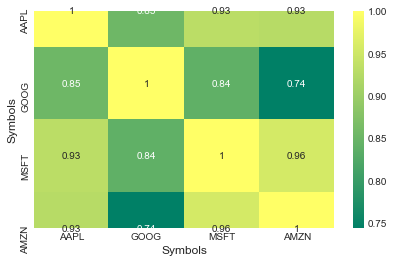

In [78]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# LET'S START PREDICTING APPLE STOCK PRICE

In [79]:

#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-09-21,110.190002,103.099998,104.540001,110.080002,195713800.0,110.080002
2020-09-22,112.860001,109.160004,112.680000,111.809998,183055400.0,111.809998
2020-09-23,112.110001,106.769997,111.620003,107.120003,150718700.0,107.120003


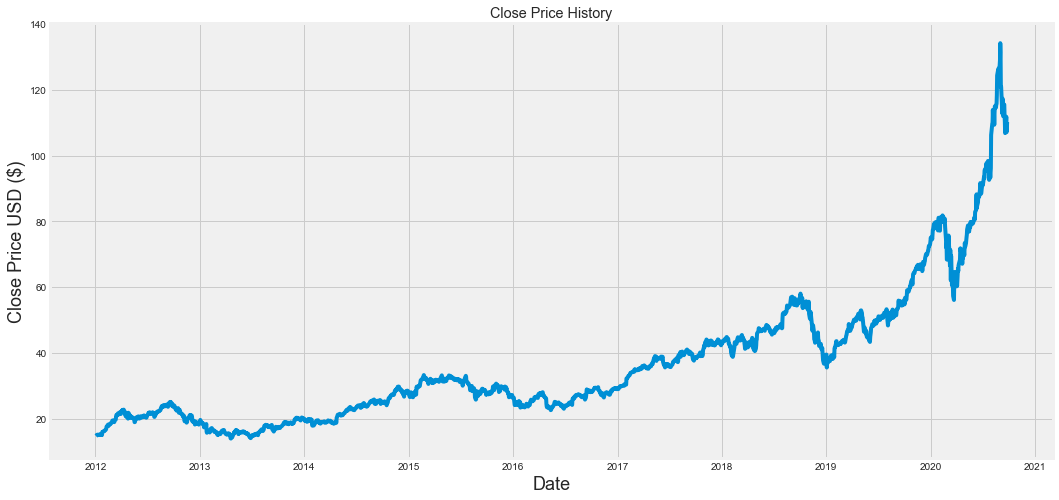

In [80]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [81]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1759

In [82]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.77493613],
       [0.78408506],
       [0.80046999]])

In [83]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1699/1699 [==============================] - 63s 37ms/step - loss: 1.9460e-04


In [85]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.1179242169043135

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


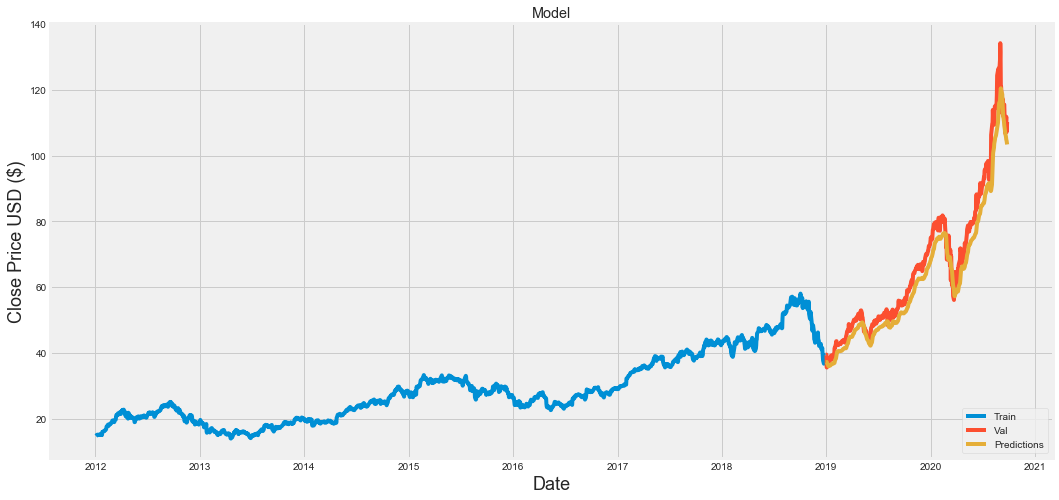

In [86]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [87]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-12-31,39.435001,37.073452
2019-01-02,39.480000,37.126598
2019-01-03,35.547501,37.229065
2019-01-04,37.064999,36.809990
2019-01-07,36.982498,36.425732
...,...,...
2020-09-21,110.080002,105.649750
2020-09-22,111.809998,104.829254
2020-09-23,107.120003,104.577400


# LET'S START PREDICTING GOOGLE STOCK PRICE

In [88]:

#Get the stock quote
df = DataReader('GOOG', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380500.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749400.0,332.892242
2012-01-05,330.745300,326.889740,329.828735,328.274536,6590300.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405900.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688800.0,310.067780
...,...,...,...,...,...,...
2020-09-21,1448.359985,1406.550049,1440.060059,1431.160034,2888800.0,1431.160034
2020-09-22,1469.520020,1434.530029,1450.089966,1465.459961,1583200.0,1465.459961
2020-09-23,1460.959961,1407.699951,1458.780029,1415.209961,1657400.0,1415.209961


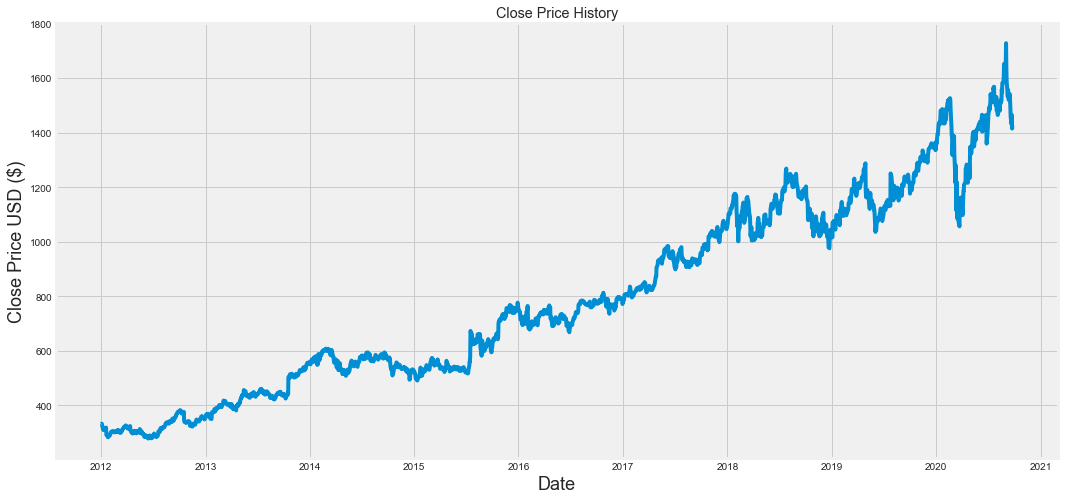

In [89]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [90]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1759

In [91]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03654398],
       [0.03753008],
       [0.03434502],
       ...,
       [0.78405965],
       [0.79308165],
       [0.79371617]])

In [92]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03654398, 0.03753008, 0.03434502, 0.03125617, 0.02178689,
       0.02202054, 0.02298945, 0.02425385, 0.02265617, 0.02388965,
       0.02537739, 0.02766569, 0.00925626, 0.00909476, 0.00751771,
       0.00358707, 0.00310948, 0.0071913 , 0.00640449, 0.00723596,
       0.00748334, 0.0089539 , 0.01280895, 0.01719313, 0.016396  ,
       0.01745427, 0.01800743, 0.01610053, 0.01826168, 0.01742334,
       0.01598027, 0.01631012, 0.01566417, 0.01888014, 0.01679801,
       0.01616924, 0.01747144, 0.01726872, 0.02038849, 0.02034039,
       0.02176628, 0.02137116, 0.01896604, 0.01577411, 0.01640632,
       0.01652314, 0.01415583, 0.01583939, 0.02017892, 0.01956389,
       0.02132993, 0.02267335, 0.02574502, 0.02557667, 0.02780655,
       0.02989214, 0.02870332, 0.03101909, 0.03022541, 0.03322836])]
[0.030702985321597487]

[array([0.03654398, 0.03753008, 0.03434502, 0.03125617, 0.02178689,
       0.02202054, 0.02298945, 0.02425385, 0.02265617, 0.02388965,
       0.02537739, 0.02766569, 0.0

In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1699/1699 [==============================] - 59s 35ms/step - loss: 0.0012


In [94]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

50.3083710518363

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


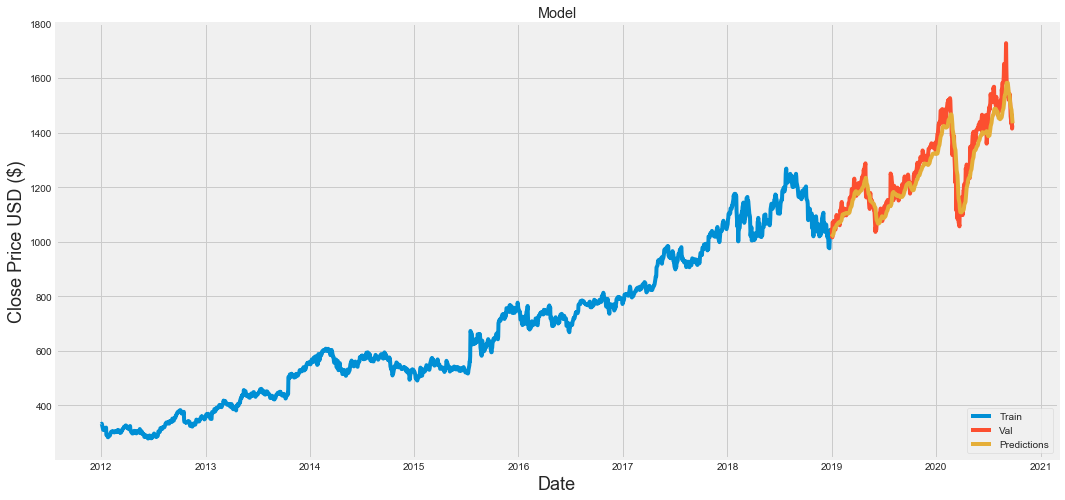

In [95]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [96]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-12-31,1035.609985,1017.624207
2019-01-02,1045.849976,1019.715698
2019-01-03,1016.059998,1022.811218
2019-01-04,1070.709961,1023.929626
2019-01-07,1068.390015,1028.041138
...,...,...
2020-09-21,1431.160034,1484.010620
2020-09-22,1465.459961,1470.056396
2020-09-23,1415.209961,1458.872070


# LET'S START PREDICTING MICROSOFT STOCK PRICE

In [97]:

#Get the stock quote
df = DataReader('MSFT', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.906679
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.422224
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.651352
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.003237
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.700455
...,...,...,...,...,...,...
2020-09-21,202.710007,196.380005,197.190002,202.539993,39839700.0,202.539993
2020-09-22,208.100006,202.080002,205.059998,207.419998,33517100.0,207.419998
2020-09-23,208.100006,200.029999,207.899994,200.589996,30803800.0,200.589996


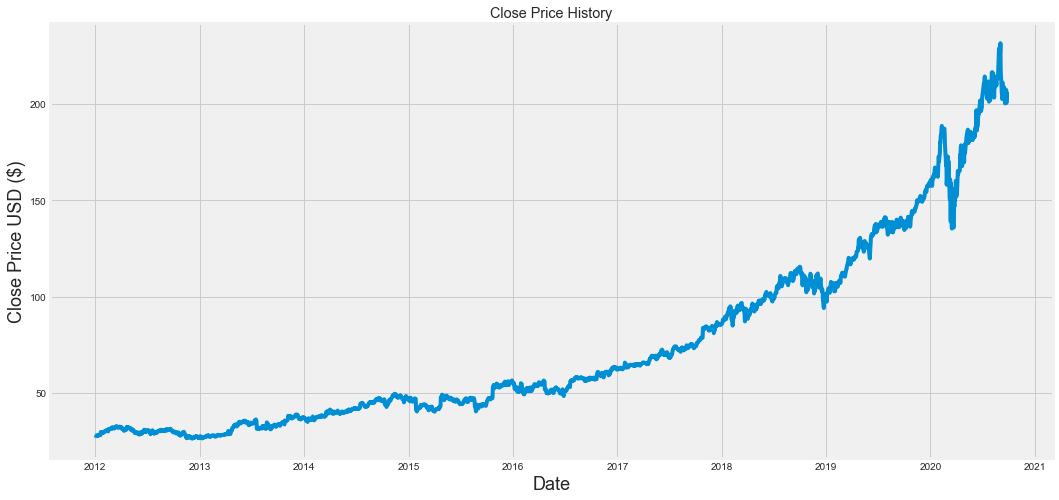

In [98]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [99]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1759

In [100]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00194856],
       [0.00501753],
       [0.00638153],
       ...,
       [0.84869447],
       [0.86136013],
       [0.87697638]])

In [101]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00194856, 0.00501753, 0.00638153, 0.00847623, 0.00667381,
       0.00716095, 0.00657638, 0.00794037, 0.00915822, 0.00920693,
       0.00906079, 0.00852494, 0.01627045, 0.01636788, 0.01446804,
       0.01553974, 0.01524746, 0.01393218, 0.01578332, 0.01539361,
       0.0171473 , 0.01743959, 0.01885229, 0.01865744, 0.01938815,
       0.02089828, 0.02143414, 0.02011886, 0.02050857, 0.01890101,
       0.01792673, 0.02396727, 0.02377241, 0.02469797, 0.02386984,
       0.02435698, 0.02489282, 0.02425955, 0.02679267, 0.02615939,
       0.02883866, 0.02781567, 0.02645167, 0.02528254, 0.02664653,
       0.02747466, 0.02737724, 0.02762081, 0.03068978, 0.03117693,
       0.03156663, 0.03034878, 0.02840023, 0.02737724, 0.02698753,
       0.02742595, 0.02747466, 0.03030008, 0.02995908, 0.02835151])]
[0.028010513869453108]

[array([0.00194856, 0.00501753, 0.00638153, 0.00847623, 0.00667381,
       0.00716095, 0.00657638, 0.00794037, 0.00915822, 0.00920693,
       0.00906079, 0.00852494, 0.0

In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1699/1699 [==============================] - 64s 38ms/step - loss: 4.0183e-04


In [103]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

15.264771208433993

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


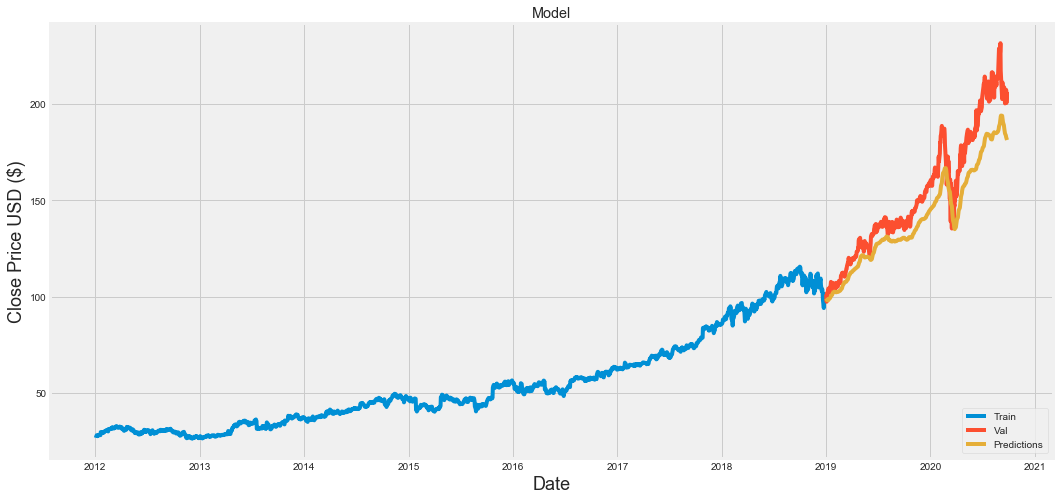

In [104]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [105]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-12-31,101.570000,99.132317
2019-01-02,101.120003,98.813881
2019-01-03,97.400002,98.606148
2019-01-04,101.930000,98.269943
2019-01-07,102.059998,98.134132
...,...,...
2020-09-21,202.539993,183.738480
2020-09-22,207.419998,182.859543
2020-09-23,200.589996,182.377686


# LET'S START PREDICTING AMAZON STOCK PRICE

In [107]:

#Get the stock quote
df = DataReader('AMZN', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2020-09-21,2962.000000,2871.000000,2906.500000,2960.469971,6117900,2960.469971
2020-09-22,3133.989990,3000.199951,3033.840088,3128.989990,6948800,3128.989990
2020-09-23,3127.000000,2992.379883,3120.429932,2999.860107,5652700,2999.860107


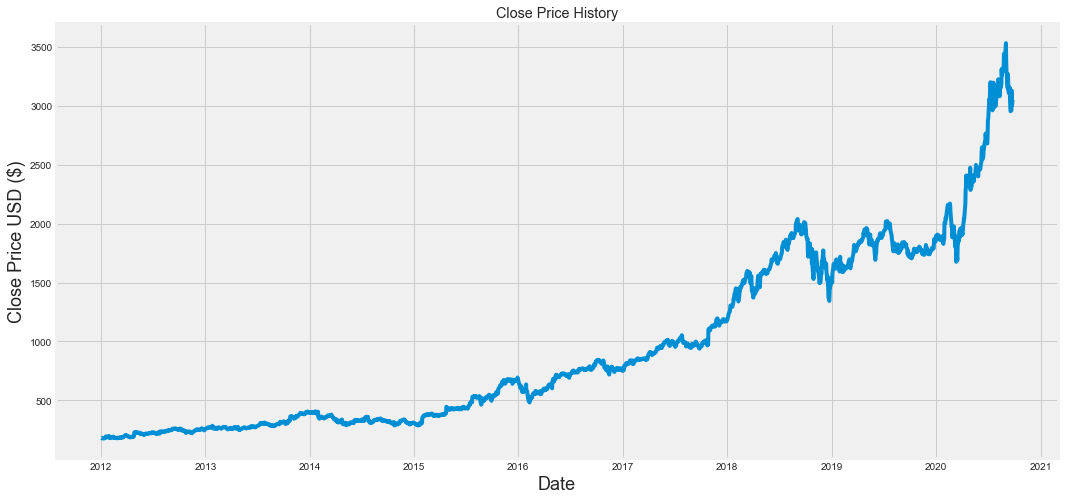

In [108]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [109]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1759

In [110]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[9.23852679e-04],
       [4.70866468e-04],
       [5.00669928e-04],
       ...,
       [8.41577505e-01],
       [8.47516952e-01],
       [8.56538278e-01]])

In [111]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00092385, 0.00047087, 0.00050067, 0.00199075, 0.00078378,
       0.00101624, 0.00088511, 0.        , 0.00074206, 0.00170764,
       0.0040262 , 0.00551927, 0.00447025, 0.00302785, 0.00329904,
       0.00353746, 0.00518251, 0.00579344, 0.00483383, 0.00551629,
       0.001052  , 0.00172552, 0.00350169, 0.0021487 , 0.00246162,
       0.00284606, 0.00269705, 0.00286394, 0.00466694, 0.00458052,
       0.00254506, 0.00119207, 0.00195797, 0.00188644, 0.00138578,
       0.00088213, 0.00095366, 0.00077484, 0.00234539, 0.00112054,
       0.00122485, 0.00100432, 0.00129041, 0.00153777, 0.00233645,
       0.00348977, 0.00250036, 0.0022232 , 0.00258082, 0.00188644,
       0.00253314, 0.00271791, 0.00285798, 0.00488747, 0.00470866,
       0.00490833, 0.00569509, 0.00802856, 0.00879447, 0.00751896])]
[0.00854711290330825]

[array([0.00092385, 0.00047087, 0.00050067, 0.00199075, 0.00078378,
       0.00101624, 0.00088511, 0.        , 0.00074206, 0.00170764,
       0.0040262 , 0.00551927, 0.00

In [112]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1699/1699 [==============================] - 55s 32ms/step - loss: 4.3313e-04


In [113]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

94.328610803974

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


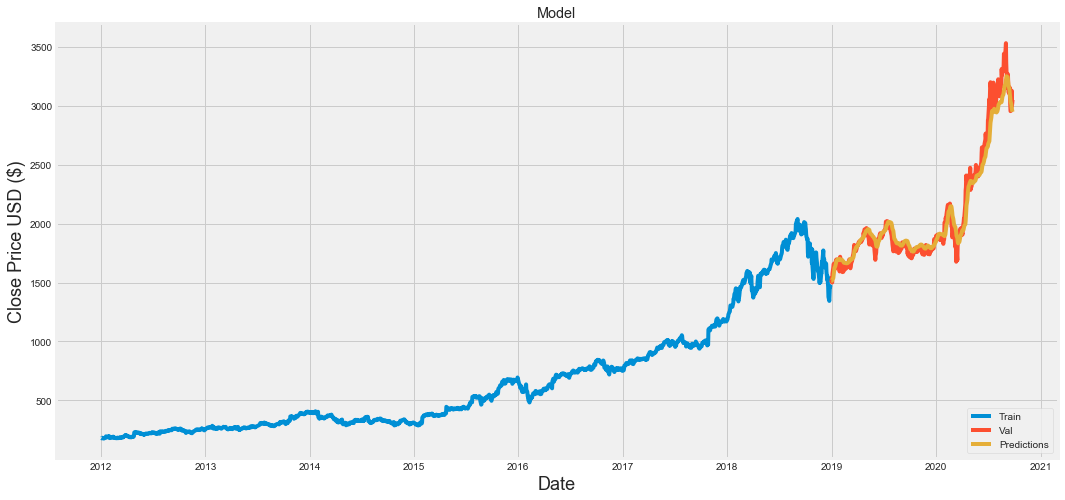

In [114]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [115]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-12-31,1501.969971,1515.029419
2019-01-02,1539.130005,1514.660889
2019-01-03,1500.280029,1520.985840
2019-01-04,1575.390015,1526.495850
2019-01-07,1629.510010,1538.151855
...,...,...
2020-09-21,2960.469971,3009.340576
2020-09-22,3128.989990,2980.537109
2020-09-23,2999.860107,2970.519531
